In [ ]:
## Problem with decision tree
## It is oversensitive to training data // High Variance model if hyperparameter is not controlled

## Random Forest (Solves the problem of variance)
# Take multiple decision trees to choose the prediction of a data point


## Bagging (BootStrapped Aggregation)
# To get Variation in decision trees
# Records are repeated
# Each BT sample is of same length as of training data 
# Not all samples are included


## Samples not included in the BT sample is called Out od Bag Samples


In [3]:
## Since the data has little variation , most of the decision tree in the forest will pick the same feature as a decision node and hence all those trees will approximately the same


## At each decision node of each tree in the forest only allow n features to partcipate out of m


## Weak Learner means they do not learn as only random number of n features are allowed to partcipate compared to all features partcipating in main DT

## Pick the maximum times we get yes or no and if continuous data take average 


## OOBE -> Out of Bag Error
## how is the performance of decision tree on the out of bag samples
## = incorrect predictions / total predictions or total BT's

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 25)
df = pd.read_csv('https://query.data.world/s/mcnmncx7l5q4clmnqwl27lmeg4nvql')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [8]:
df.drop(index = df[df['TotalCharges'] == ' '].index, inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
X = df.drop(columns = 'Churn')
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(oob_score=True)
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [11]:
pred = rf_clf.predict(X_test)

In [12]:
rf_clf.oob_score_
# oob_error = 1- rf_clf.oob_score_

0.7935798455912231

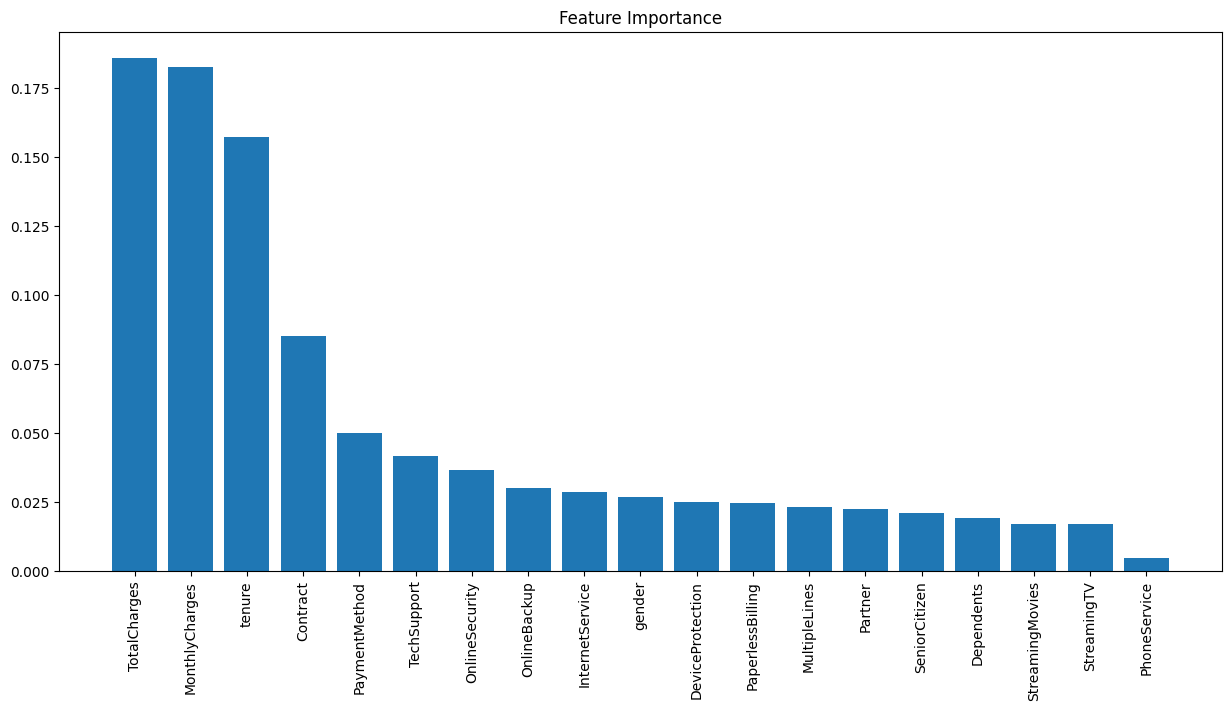

In [13]:
# Feature Importance

import matplotlib.pyplot as plt
import numpy as np

importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test,pred))
print("Precision: ", precision_score(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred))


Precision:  0.6326963906581741
Recall:  0.5120274914089347
Precision:  0.6326963906581741
F1 Score:  0.5660018993352327


In [15]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [20]:
from sklearn.model_selection import GridSearchCV
est = RandomForestClassifier()
grid = GridSearchCV(estimator = est,
                    param_grid = params,
                    scoring = 'recall',
                    cv = 3,
                    n_jobs=-1
                    )
grid.fit(X, y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 100}
Best score:  0.5264847512038523


In [21]:
from scipy.stats import randint, uniform

params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy']
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                            param_distributions = params,
                            scoring = 'recall',
                            cv = 3,
                            n_jobs=-1,
                            n_iter=10
                            )
random.fit(X, y)

print("Best params: ", random.best_params_)
print("Best score: ", random.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 125}
Best score:  0.5131086142322098
